In [32]:
import tensorflow as tf
import os
import numpy as np

In [33]:
#@title Choosing Resources

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
   tf.config.experimental.set_memory_growth(gpu, True)

In [34]:
import os
import cv2
import imghdr

image_exts = ['jpg', 'jpeg', 'png', 'bmp']
image_path = 'Bengins.jpg'
try:
    tip = imghdr.what(image_path)  # xác định định dạng hình ảnh
    if tip not in image_exts:
        print('Image not in ext list {}'.format(image_path))
    else:
        img = cv2.imread(image_path)
        # Thực hiện xử lý trên ảnh ở đây
except Exception as e:
    print('Issue with image {}'.format(image_path))


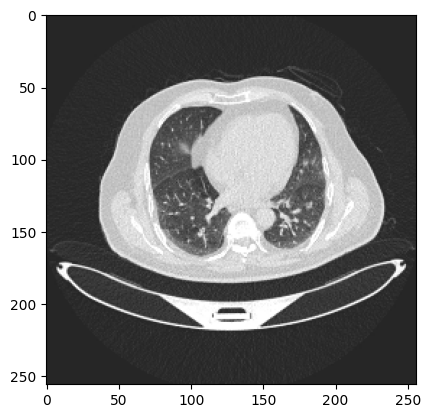

In [35]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

# Load ảnh từ đường dẫn và chuyển đổi thành mảng numpy
img = load_img(image_path, target_size=(256, 256))  # Thay target_size bằng kích thước bạn muốn
img_array = img_to_array(img)

# Hiển thị ảnh
plt.imshow(img_array.astype(int))
plt.show()


In [36]:
# Scale the image
scaled_img_array = img_array / 255.0

# Check the maximum value after scaling
print("Maximum value after scaling:", scaled_img_array.max())

Maximum value after scaling: 1.0


In [22]:
# Load model 1 with keras

from keras.models import load_model

# Đường dẫn tới tệp mô hình đã lưu
model_path = 'D:/really/models/imageclassifier1.keras'

# Tải lại mô hình
model1 = load_model(model_path)

KeyboardInterrupt: 

In [8]:
from keras.models import load_model      #Load model 2

# Đường dẫn tới tệp mô hình đã lưu
model_path2 = 'D:/really/models/imageclassifier2.keras'

# Tải lại mô hình
model2 = load_model(model_path2)

c:\Users\ADmin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 982 variables whereas the saved optimizer has 6 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [9]:
from keras.models import load_model      #Load model 3

# Đường dẫn tới tệp mô hình đã lưu
model_path3 = 'D:/really/models/imageclassifier3.keras'

# Tải lại mô hình
model3 = load_model(model_path3)

c:\Users\ADmin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 160 variables whereas the saved optimizer has 6 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [37]:
# Make prediction
predictions1 = model1.predict(np.array([scaled_img_array]))

# Interpret prediction
for pred in predictions1:
    max_index = np.argmax(pred)  # Get the index of the highest value in pred
    if max_index == 0:
        print("The image is predicted to be Bengin.")
    elif max_index == 1:
        print("The image is predicted to be Malginant.")
    elif max_index == 2:
        print("The image is predicted to be normal.")
        
predictions1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
The image is predicted to be Bengin.


array([[0.5317335 , 0.05167107, 0.41659546]], dtype=float32)

In [38]:
predictions2 = model2.predict(np.array([scaled_img_array]))

# Interpret prediction
for pred in predictions2:
    max_index = np.argmax(pred)  # Get the index of the highest value in pred
    if max_index == 0:
        print("The image is predicted to be Bengin.")
    elif max_index == 1:
        print("The image is predicted to be Malginant.")
    elif max_index == 2:
        print("The image is predicted to be normal.")
predictions2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
The image is predicted to be Bengin.


array([[0.9471828 , 0.05144921, 0.00136792]], dtype=float32)

In [39]:
predictions3 = model3.predict(np.array([scaled_img_array]))

# Interpret prediction
for pred in predictions3:
    max_index = np.argmax(pred)  # Get the index of the highest value in pred
    if max_index == 0:
        print("The image is predicted to be Bengin.")
    elif max_index == 1:
        print("The image is predicted to be Malginant.")
    elif max_index == 2:
        print("The image is predicted to be normal.")
print(predictions1[0])
print(predictions2[0])
print(predictions3[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
The image is predicted to be Bengin.
[0.5317335  0.05167107 0.41659546]
[0.9471828  0.05144921 0.00136792]
[0.96735716 0.00255434 0.0300885 ]


In [26]:
import numpy as np

# Định nghĩa một mảng NumPy toàn 0 với shape (kích thước) (n,)
n = 5
RC1 = np.zeros(3)
RC2 = np.zeros(3)
RC3 = np.zeros(3)

In [27]:
for i in range(len(RC1)):
    RC1[i] = 2 *(1 - pow(2,predictions1[0][i]-1))
    RC2[i] = 2*(1 - pow(2,predictions2[0][i]-1))
    RC3[i] = 2*(1 - pow(2,predictions3[0][i]-1))
    
print(RC1)
print(RC2)
print(RC3)

[0.51977466 0.9998053  0.64911741]
[0.73307272 0.99974384 0.42178171]
[0.47303929 0.99999265 0.69021821]


In [28]:
FRS = np.zeros(3)
for i in range(len(FRS)):
    FRS[i] = RC1[i] + RC2[i] + RC3[i]

FRS

array([1.72588667, 2.99954178, 1.76111732])

In [29]:
CCFS = np.zeros(3)

CCFS[0] = 1 - (1/3 * (predictions1[0][0] + predictions2[0][0] + predictions3[0][0]))
CCFS[1] = 1 - (1/3 * (predictions1[0][1] + predictions2[0][1] + predictions3[0][1]))
CCFS[2] = 1 - (1/3 * (predictions1[0][2] + predictions2[0][2] + predictions3[0][2]))

CCFS
    

array([0.49406219, 0.99977967, 0.50615815])

In [30]:
FDS = np.zeros(3)
for i in range(len(FDS)):
    FDS[i] = FRS[i] * CCFS[i]
FDS

array([0.85269534, 2.99888089, 0.89140389])

In [31]:
min_index = 100000000
index = 5
for i in range(len(FDS)):
      # Get the index of the highest value in pred
      if min_index > FDS[i]:
          min_index = FDS[i]
          index = i
          
          
if index == 0:
    print("The image is predicted to be Bengin.")
elif index == 1:
    print("The image is predicted to be Malginant.")
elif index == 2:
    print("The image is predicted to be normal.")

The image is predicted to be Bengin.
